# Logistic Regression
### Siva.Jasthi@metrostate.edu

### Reference: https://www.w3schools.com/python/python_ml_logistic_regression.asp
### Scikit-Learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [2]:
#@title Get tht the datafile directly using wget (web get) (Use the raw content)
!wget https://raw.githubusercontent.com/sjasthi/python_input_files/main/MachineLearning/diabetes.csv
!wget https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

--2025-11-08 14:19:49--  https://raw.githubusercontent.com/sjasthi/python_input_files/main/MachineLearning/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-11-08 14:19:49 (75.9 MB/s) - ‘diabetes.csv’ saved [23873/23873]

--2025-11-08 14:19:49--  https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


# Logistic Function (Sigmoid Function)
https://miro.medium.com/max/1033/0*D5do3xhv5ulF50w2.png

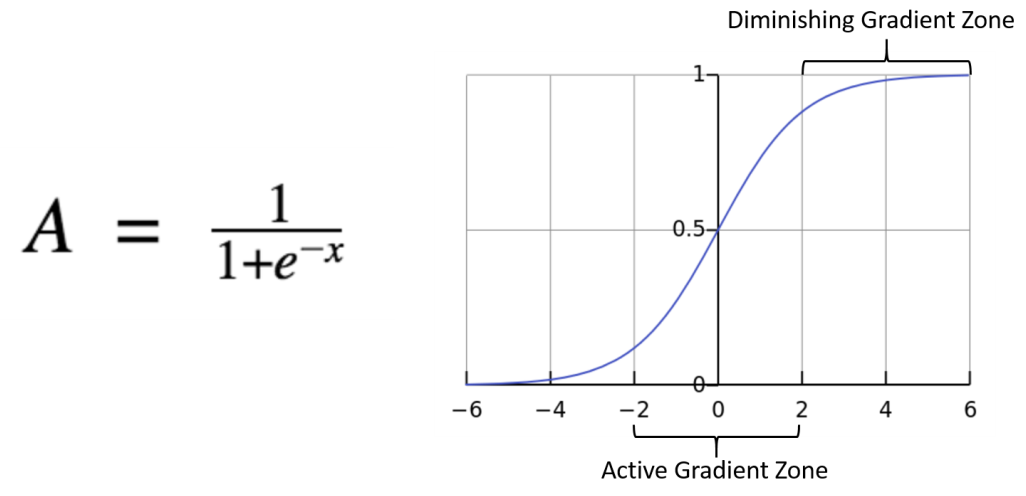

In [3]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

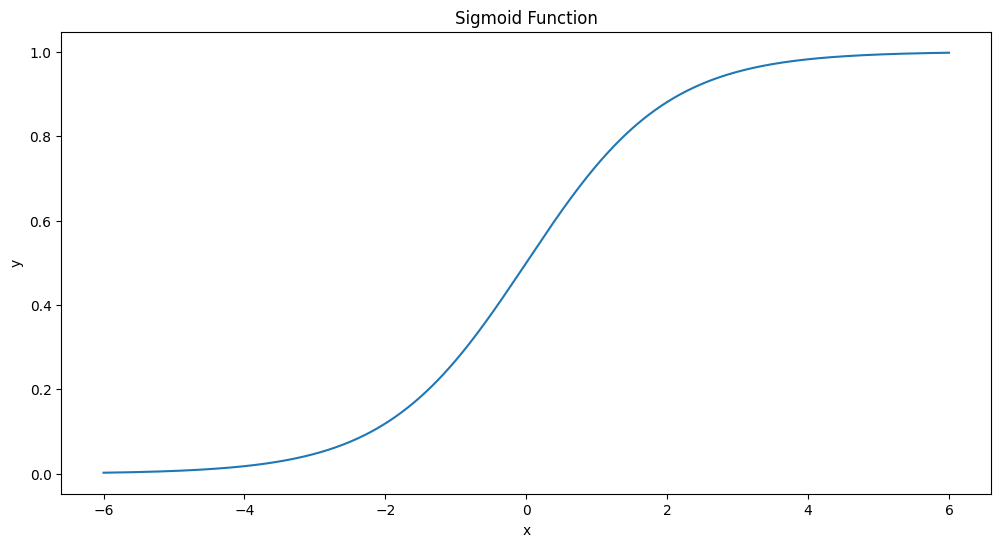

In [4]:
#@title Logistic Regression (Sigmoid function aka Logistic function)
# Get the evenly spaced numbers from start to stop
x = np.linspace(-6, 6, num = 1000)

# Set the plot size
plt.figure(figsize=(12, 6))

# Plot the sigmoid function for the given x
plt.plot(x, 1 / (1 + np.exp(-x)) )  # Correct the plotting statement

# Set the labels
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")

# Show the plot
plt.show()


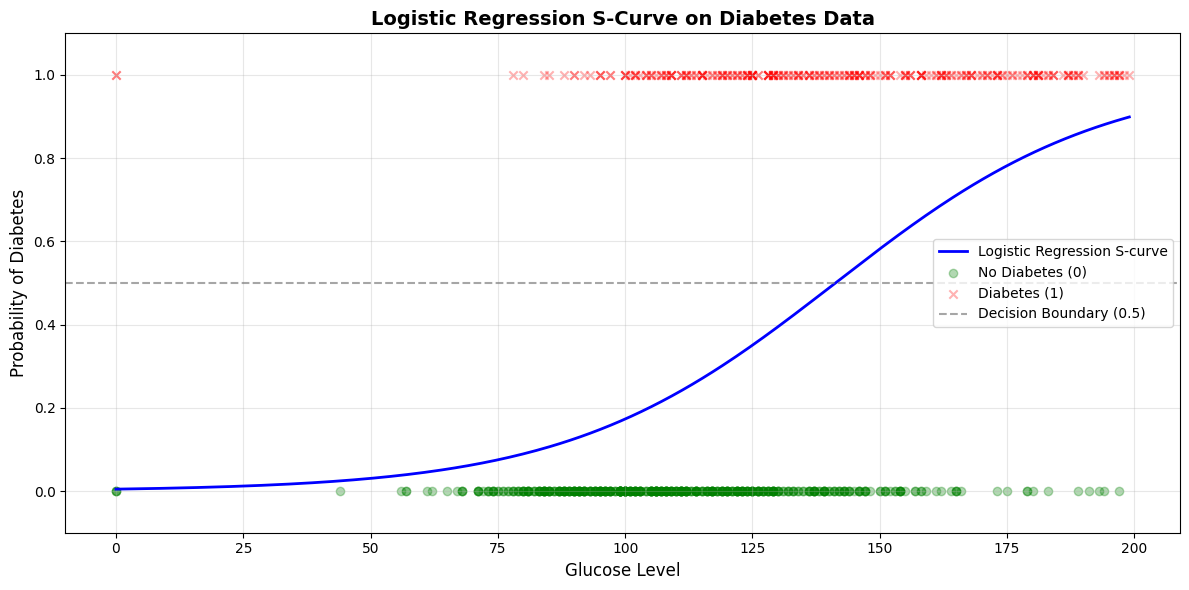


Model Coefficient (slope): 0.0379
Model Intercept: -5.3499

The S-curve shows how the probability of diabetes increases with glucose level.
Values above 0.5 probability are classified as diabetes (1), below as no diabetes (0).


# scikit-learn Logistic Regression Model (Cheat Sheet)

In [6]:
from sklearn.utils.multiclass import type_of_target

#@title All that you need to know about scikit-learn Logistic Regression Model
# Import the packages and classes needed in this example:
import numpy
from sklearn.linear_model import LogisticRegression

#X represents the size of a tumor in centimeters.
feature = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
target = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

#Build the model
logr = LogisticRegression()
logr.fit(feature, target)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print('Predict if tumor is cancerous where the size is 3.46mm:', predicted)

#predict if tumor is cancerous where the size is 6mm:
predicted = logr.predict(numpy.array([6]).reshape(-1,1))
print('Predict if tumor is cancerous where the size is 6mm:', predicted)


predictions = logr.predict(feature)
print('Number of features and Number of predictions: ', len(feature), len(predictions))
print('Actual Values of features and predictions: ', feature, predictions)
print(classification_report(target, predictions))
confusion_matrix(target, predictions)


Predict if tumor is cancerous where the size is 3.46mm: [0]
Predict if tumor is cancerous where the size is 6mm: [1]
Number of features and Number of predictions:  12 12
Actual Values of features and predictions:  [[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]] [1 0 0 0 0 0 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



array([[5, 1],
       [0, 6]])

In [7]:
#@title What is the coefficient?
# The logistic regression the coefficient is the expected change
# in log-odds of having the outcome per unit change in X.

log_odds = logr.coef_
odds = np.exp(log_odds)
print("Odds: ", odds)

print("As the size of a tumor increases by 1 mm, the odds of it being a tumor increases by 4x")

Odds:  [[4.03557295]]
As the size of a tumor increases by 1 mm, the odds of it being a tumor increases by 4x


In [8]:
#@title Logic to Probabilities
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  # Find the log-odds of each observation
  log_odds = logr.coef_ * X + logr.intercept_

  # To then convert the log-odds to odds we must exponentiate the log-odds.
  odds = numpy.exp(log_odds)

  # we can convert the odds to probability by dividing it by 1 plus the odds.
  probability = odds / (1 + odds)

  # return the probability
  return(probability)

# fint the probabibilities from the logistic regression model and the input vector
probabilities = logit2prob(logr, X)

# print the data
print(type(X))
print(type(probabilities))

df = pd.DataFrame(zip(X,probabilities), columns = ['Tumor Size', 'Probability'])
display(df)


print('Ex1:The probability that a tumor with the size 3.78cm is cancerous is 61%.')
print('Ex2:The probability that a tumor with the size 2.44cm is cancerous is 19%.')


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


,Tumor Size,Probability
0,[3.78],[0.6074916769842935]
1,[2.44],[0.1926755459246134]
2,[2.09],[0.12774788044472804]
3,[0.14],[0.009550559963529303]
4,[1.72],[0.08037781301963826]
5,[1.65],[0.0734485020779108]
6,[4.92],[0.8836285734492775]
7,[4.37],[0.7790120298139722]
8,[4.96],[0.8892453425207261]
9,[4.52],[0.8129343095088601]


Ex1:The probability that a tumor with the size 3.78cm is cancerous is 61%.
Ex2:The probability that a tumor with the size 2.44cm is cancerous is 19%.


# Logistic Regression on Diabetics

https://medium.com/@pragya_paudyal/diabetics-prediction-using-logistic-regression-in-python-e51b90630f2f

### The classification goal is to predict whether or not the patients in the dataset have diabetes or not.


In [9]:
#@title Load the diabetes dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#@title Display the first 5 rows transposed for better visualization
df.head().transpose()

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [11]:
#@title Describe the dataset to see any missing counts
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#@title Prepare the data (features and target)
features = df.drop('Outcome', axis = 1)
target = df[['Outcome']]

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = 7)

print('Training Sets: Count of Feature instances: ', len(feature_train))
print('Training Sets: Count of Target instances: ', len(target_train))

print('Testing Sets: Count of Feature instances: ', len(feature_test))
print('Testing Sets: Count of Target instances: ', len(target_test))

print("\n\n Features")
display(features.head())

print("\n\n Target")
display(target.head())

Training Sets: Count of Feature instances:  576
Training Sets: Count of Target instances:  576
Testing Sets: Count of Feature instances:  192
Testing Sets: Count of Target instances:  192


 Features


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33




 Target


,Outcome
0,1
1,0
2,1
3,0
4,1


In [13]:
#@title Build the Logistic regression model
#Note: The model parameters are changed as the default values are not converging
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(feature_train, target_train.values.ravel())

LogisticRegression(max_iter=1000)

In [14]:
#@title Predict the targets for the given feature_test
target_predicted = model.predict(feature_test)


In [15]:
#@title Display the targets (predicted and actual)
display("target_predicted (estimated): ", target_predicted)
display("target_test (actual): ", target_test['Outcome'].to_numpy())

'target_predicted (estimated): '

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

'target_test (actual): '

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [16]:
#@title How many 1s and 0s in actual (test) vs predicted (estimated)?
ones_in_target_predicted = (target_predicted == 1).sum()
zeros_in_target_predicted = (target_predicted == 0).sum()

ones_in_target_test = (target_test == 1).sum()
zeros_in_target_test = (target_test == 0).sum()

print('Count of 1s in target_predicted: ', ones_in_target_predicted)
print('Count of 1s in target_test: ', ones_in_target_test)


print('\nCount of 0s in target_predicted: ', zeros_in_target_predicted)
print('Count of 0s in target_test: ', zeros_in_target_test)

Count of 1s in target_predicted:  49
Count of 1s in target_test:  Outcome    70
dtype: int64

Count of 0s in target_predicted:  143
Count of 0s in target_test:  Outcome    122
dtype: int64


Text(0.5, 427.9555555555555, 'Predicted diagnosis')

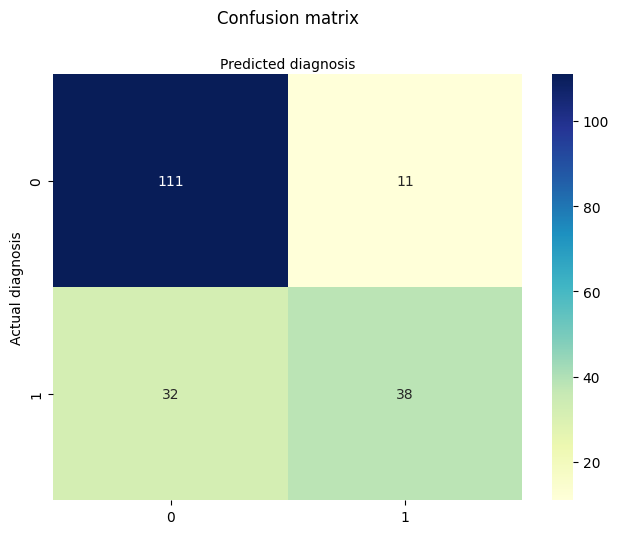

In [17]:
#@title Visualizing the performance of Logistic Regression
# Import the metrics class
from sklearn import metrics
# Create the Confusion Matrix

cnf_matrix = metrics.confusion_matrix(target_test, target_predicted)

# Visualizing the Confusion Matrix
class_names = [0,1] # Our diagnosis categories

fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')

In [18]:
#@title Find out the model scores
model_score = model.score(feature_test, target_test)
print("Model Score: ", model_score)

accuracy = metrics.accuracy_score(target_test, target_predicted)
print("Accuracy Score: ", accuracy)

precision = metrics.precision_score(target_test, target_predicted)
print("Precision Score: ", precision)

recall = metrics.recall_score(target_test, target_predicted)
print("Recall Score: ", recall)


Model Score:  0.7760416666666666
Accuracy Score:  0.7760416666666666
Precision Score:  0.7755102040816326
Recall Score:  0.5428571428571428


# Logistic Regression - Visualizing the S-Curve

In [ ]:
#@title Visualize S-curve (Sigmoid) on Diabetes Data
# Load the diabetes dataset
df = pd.read_csv('diabetes.csv')

# For visualization purposes, we'll use a single feature
# Let's use 'Glucose' as it's often a strong predictor
X_single = df[['Glucose']].values
y = df['Outcome'].values

# Train logistic regression on single feature
lr_model = LogisticRegression()
lr_model.fit(X_single, y)

# Create a range of values for smooth curve
X_range = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)
y_prob = lr_model.predict_proba(X_range)[:, 1]

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the S-curve (predicted probabilities)
plt.plot(X_range, y_prob, 'b-', linewidth=2, label='Logistic Regression S-curve')

# Plot the actual data points
plt.scatter(X_single[y==0], y[y==0], c='green', alpha=0.3, label='No Diabetes (0)', marker='o')
plt.scatter(X_single[y==1], y[y==1], c='red', alpha=0.3, label='Diabetes (1)', marker='x')

# Add a horizontal line at y=0.5 (decision boundary)
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Decision Boundary (0.5)')

# Labels and title
plt.xlabel('Glucose Level', fontsize=12)
plt.ylabel('Probability of Diabetes', fontsize=12)
plt.title('Logistic Regression S-Curve on Diabetes Data', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

# Print the coefficients
print(f'\nModel Coefficient (slope): {lr_model.coef_[0][0]:.4f}')
print(f'Model Intercept: {lr_model.intercept_[0]:.4f}')
print(f'\nThe S-curve shows how the probability of diabetes increases with glucose level.')
print(f'Values above 0.5 probability are classified as diabetes (1), below as no diabetes (0).')

# New Section